# Assignment 7
**CS283 Computer Vision, Harvard University, Fall 2023**

**Due Wednesday, Nov. 1, at 11:59pm**

Name: *(<font color=red>Alexia Hartogensis</font>)*

---

This assignment reinforces your understanding of radiometry, reflectance and color. As usual, there is an important Hints and Information section at the end of this notebook.

Begin by creating a copy of this notebook in your google drive at filepath `My Drive/cs-283-assignments/A7/pset7.ipynb`. Then edit the notebook and submit it according to the instructions on the course website.

As usual, some of the questions in this notebook require answers that comprise text and equations instead of code. For these you have two options: (i) type your response in the notebook using markdown and latex; or (ii) write your answers by hand. (If you choose to write your answers by hand, you must be able to record them in a PDF file, either by writing on a tablet or by using pencil and paper and then scanning with a camera-scan app. See the submission instructions on the course website for details.


***

##Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# YOU SHOULD HAVE ALREADY COPIED OVER THE ASSIGNMENT FILES TO A FOLDER
# TITLED "cs-283-assignments" ON YOUR GOOGLE DRIVE
%cd "/content/drive/My Drive/cs-283-assignments/A7"

# %cd "/content/drive/MyDrive/Courses/CS_283/CS283_2023/Assignments/repo/CS283-2023/assignments/pset7"


/content/drive/My Drive/cs-283-assignments/A7


In [3]:
# Download source files
!curl https://codeload.github.com/Harvard-CS283/pset-data/tar.gz/main | \
    tar -xz --strip=2 pset-data-main/pset7

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60.7M    0 60.7M    0     0  9533k      0 --:--:--  0:00:06 --:--:-- 11.3M


In [4]:
# Import any required libraries here
import cv2                # OpenCV
import numpy as np        # numpy
import pickle

from matplotlib.colors import LightSource
from matplotlib import cm
import scipy.linalg

# Use this line to make matplotlib plot inline (only need to call it once when importing matplotlib)
# For 3D plotting, it can be helpful to call %matplotlib notebook, but note that if you want to switch back to inline,
# you'll need to restart the kernel
%matplotlib inline

import matplotlib.pyplot as plt
# Modify this line to adjust the displayed plot size. You can also call
# it with different parameters before specific plots.
plt.rcParams['figure.figsize'] = [10, 10]

## Question 1 (15%)

For Lambertian surfaces, the BRDF is a constant function of the input and output directions. For such a material, we often describe the reflectance in terms of its *albedo*, which is given the symbol $\rho$.  For a Lambertian
surface, the BRDF and albedo are related by $f(\hat\omega_i,\hat\omega_o)=\rho/\pi.$  Using conservation of energy, prove
that $0\le\rho\le1$.

## Answer ##

The principle of conservation of energy states that within a closed system, the energy remains consistent throughout time. BRDF or Bi-directional Reflectance Distribution Function refers to light and reflection. Thus, when we consider conservation of energy interms of BRDF, we are looking at the energy is conserved within the incoming light to the outcoming light.

To prove that $0\le\rho\le1$, we want to prove that all incoming radiance $\hat\omega_i$ onto the surface is equal to all outcoming radiance $\hat\omega_o$. Therefore we will integrate through all the incoming radience and set it less than or equal to $\rho$.

$\int_{\Omega} f_o(\hat\omega_i, \hat\omega_o) * cos Θ_i \, dω_i \le1$

$\int_{\Omega} \frac{\rho}{\pi} * cos Θ_i \, dω_i \le1$

$\frac{\rho}{\pi} * \int_{\Omega} * cos Θ_i \, dω_i \le1$

The integral of $cos Θ_i$ over the hemisphere is equal to $\pi$

$\frac{\rho}{\pi} * \pi \le1$

$\rho \le1$

We now know that $\rho \le1$ but we still need to prove that $0\le\rho$. From the definition of BRDF, $f_o(\hat\omega_i, \hat\omega_o)$ must be positive and therefore $0 \le f_o(\hat\omega_i, \hat\omega_o)$.

$0 \le \frac{\rho}{\pi}$

$0 \le \rho$

In conclusion, $0\le\rho\le1$.

### Disclosure of use of Generative AI for this question


<br />

*If you used Generative AI tools for this question, write your summary here.*

<br />


## Question 2 (15%)

A small Lambertian source $dA$ is centered at $P$ and emits radiance L. The orientation of this patch is the same as that of a plane containing two points,  $X_1$ and $X_2$. The point $X_1$ is the point on this plane that is closest to $P$, and the distance from $P$ to $X_1$ is $D$ as shown.

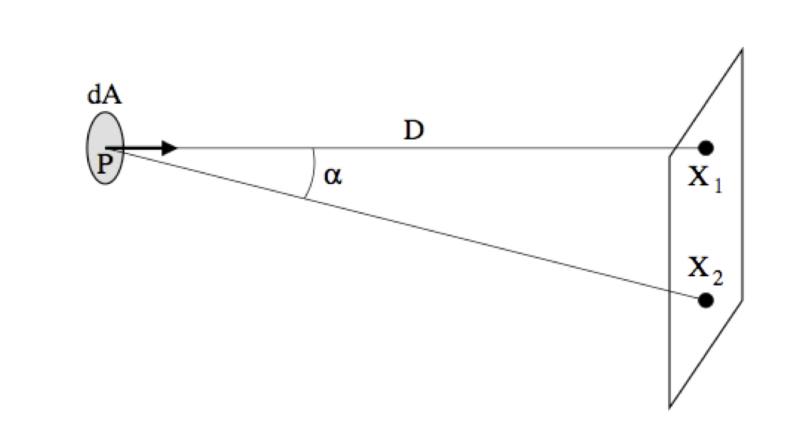

In [5]:
#@title Figure { display-mode: "code" }
plt.imshow(cv2.imread('img/radiance_irradiance.png')[:, :, ::-1]); plt.axis('off');

**a.** Calculate the solid angle subtended by $dA$ at points $X_1$ and $X_2$.



## Answer ##

The formula for a solid angle is $d\omega = \frac{Area}{distance^2}$. The area of the surface patch is dA but it depends on the orientation so the area is $dA \cos(\alpha)$. Since the distance from the source to $X_1$ and $X_2$ is different, we must solve for different subtended angles for $X_1$ and $X_2$.

First we will solve for $X_1$ where the distance to P is D. Since the angle between the radiance and the noraml is 0, the area is dA.

$d\omega_1 = \frac{Area}{distance^2}$

$d\omega_1 = \frac{dA}{distance^2}$

$d\omega_1 = \frac{dA}{D^2}$

Then we will solve for $X_2$ where the distance to P is not D so you have to multiple the distance by $\cos(\alpha)$.

$d\omega_2 = \frac{Area}{distance^2}$

$d\omega_2 = \frac{dA\cos(\alpha)}{D^2} * \cos(\alpha)^2$

$d\omega_2 = \frac{dA\cos(\alpha)^3}{D^2}$

So the solid angle subtended by dA to $X_1$ is $\frac{dA}{D^2}$ and the angle subtended to $X_2$ is $\frac{dA\cos(\alpha)^3}{D^2}$.

**b.** Calculate the irradiance $E$ incident on the plane at points $X_1$ and $X_2$, and calculate the ratio $E(X_1)/E(X_2)$.

## Answer ##

The irradience is a measure of incoming light that is independent of a sensor area and is used to describe an incident light at a surface. In this case, the irradiance E incident on the plane at points $X_1$ and $X_2$ is the measure of the radiance L from source centered at dA. The formula for irradiance is the radiant flux over the area of the sensor.

$E = \frac{\Phi(W,X)}{dA}$

Radiance allows us to compute the radiant flux measured by any finite sensor. Although in this case, we are veiwing the irradiance which is independent of a sensor and thus not integrated.

$\Phi(W,X) = \int_{W} L(\hatω,x)\cos(\theta)dω$

And we are considering the entire angle $Ω$ so we do not need to intergrate.

$\Phi(W,X) = L(\hatω,x)\cos(\theta)d\Omega$

For the $X_1$, the angle between the radiance and the normal is zero so the irradience for $X_1$ is as follows.

$E(X_1) = L \cos(0) dΩ_1$

$E(X_1) = L \frac{dA}{D^2}$

For the $X_2$, the angle between the radiance and the normal is $\alpha$ so the irradience for $X_2$ is as follows.

$E(X_2) = L \cos(\alpha) dΩ_2$

$E(X_2) = L \cos(\alpha) \frac{dA \cos(\alpha)^3}{D^2}$

$E(X_2) = L \frac{dA \cos(\alpha)^4}{D^2}$

The ratio of $\frac{E(X_1)}{E(X_2)}$

$\frac{E(X_1)}{E(X_2)} = \frac{L\frac{dA}{D^2}}{L \frac{dA \cos(\alpha)^4}{D^2}} $

$\frac{E(X_1)}{E(X_2)} = \frac{1}{\cos(\alpha)^4} $

### Disclosure of use of Generative AI for this question


<br />

*If you used Generative AI tools for this question, write your summary here.*

<br />


## Question 3 (30% + 10% bonus)

The data folder of this assignment contains a set of seven photometric stereo images <tt>./data/face_01.tif</tt> through <tt>./data/face_07.tif</tt>, along with <tt>sources.pickle</tt>, which containins the light source vectors (in a variable named <tt>S</tt>).

**a.** Estimate the surface normal and grayscale albedo for each pixel. Plot these values using <tt> matplotlib.pyplot.imshow()</tt> for the albedo values and <tt> matplotlib.pyplot.quiver()</tt> for the $x$-$y$ components of the surface normals. (See example in the *Hints and Information* section below.)


(-0.5, 368.5, 430.5, -0.5)

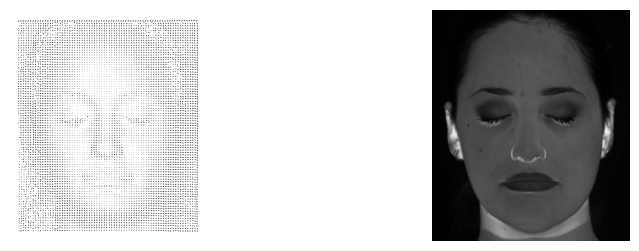

In [6]:
images = [cv2.imread(f'./data/face_0{i}.tif', cv2.IMREAD_GRAYSCALE) for i in range(1, 8)]

import pickle
source = pickle.load(open('./data/sources.pickle', 'rb'))

sources = source['S']

h, w = images[0].shape

b = np.zeros((h, w, 3))
albedo = np.ones((h, w))
normals = np.dstack((np.zeros((h, w)), np.zeros((h, w)), np.ones((h, w))))


for i in range(h):
  for j in range(w):
    pixel_values = [image[i, j] for image in images]
    b[i, j, :] = np.dot(np.dot(np.linalg.inv(np.dot(sources.T, sources)), sources.T), pixel_values)
    albedo[i, j] = np.linalg.norm(b[i, j, :])
    normals[i, j, :] = b[i, j, :] / albedo[i, j]

vect_x = normals[:, :, 0]
vect_y = normals[:, :, 1]


albedo = (albedo/np.max(albedo)*255).astype(np.uint8)

# vect_x is an HxW array of x-components
# vect_y is an HxW array of y-components
plt.figure(figsize=(10,3))
plt.subplot(121)
n = 5
plt.quiver(vect_x[::n, ::n], vect_y[::n, ::n], cmap='gray')
plt.gca().invert_yaxis()
plt.axis('image')
plt.axis('off')

plt.subplot(122)
plt.imshow(albedo, cmap='gray')
plt.axis('image')
plt.axis('off')

**b.** Note the poor estimates of the albedo (and surface normal) in the area surrounding the nostrils.  What is the source of this error? Describe one method for finding a better estimate of this information from these seven images.

## Answer ##

When looking at the area sorrounding the nostrils. ears, and neck, the shading is off and appears to be illuminating. These poor estimates of the albedo and surface normal are due to the various radiance or light intensities. Shadows cast on the nose and highlights on different parts of the skin, lead to abnormalities in the surface area and albedo.

A method to prevent this poor estimation is normalizing the pixel values. If you normalize the varying radiance intensities, then all the albedo and surface normals would be even. We can do this by dividing each pixel by the maximum intensity of the pixels so they scale on a interval of 0 to 1.

**c.** Use the recovered surface information to predict what the person would look like (in grayscale) if illuminated from direction $\hat{s}=(0.58,-0.58,-0.58)$ and from direction $\hat{s}=(-0.58,-0.58,-0.58)$. Display your results.

Text(0.5, 1.0, 'Illuminated from s2')

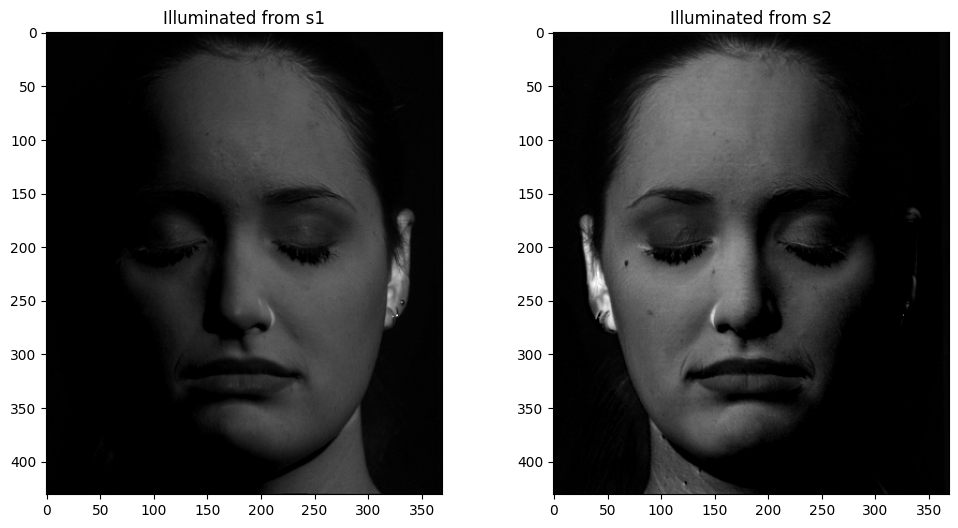

In [7]:
s1 = np.array([0.58, -0.58, -0.58])
s2 = np.array([-0.58, -0.58, -0.58])
L1 = np.maximum(0, np.sum(normals * s1, axis=2))
L2 = np.maximum(0, np.sum(normals * s2, axis=2))

image1 = albedo * L1
image2 = albedo * L2

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(image1, cmap='gray')
plt.title("Illuminated from s1")

plt.subplot(122)
plt.imshow(image2, cmap='gray')
plt.title("Illuminated from s2")



**d.** The function <tt> integrate_frankot()</tt> below can be used to recover a surface $z(x,y)$ from your
surface normals $\hat{n}(x,y)$. Run the two cells below to generate and display your surface, and then modify the second cell to include two new views of your surface.

In [8]:
def integrate_frankot(N):

    """
    integrate_frankot(N) takes an PxQx3 field of normal vectors (the third
    dimension is [x y z]) and returns a PxQ array corresponding to the
    depth of the surface, with the mean depth equal to zero.

    Reference: Frankot, R. and Chellapa, R. (1988) "A Method for Enforcing
    Integrability in Shape from Shading Algorithms."  IEEE Trans. Pattern
    Anal. Mach. Intell. 10(4):439-451.

    Args:
        N: PxQx3 field of normal vectors

    Returns:
        PxQ array corresponding to the depth of the surface, with the mean depth equal to zero

    """

    h, w = N[:, :, 0].shape

    # complain if P or Q are too big
    if (h > 512) |  (w > 512):
        print('Input array too big.  Choose a smaller window.')

    # pad the array to 512x512
    nrows = 2 ** 9
    ncols = 2 ** 9

    # get surface slopes from normals; ignore points where normal is [0 0 0]
    x_sample = 1
    y_sample = 1
    zx = -x_sample * (np.sum(N, 2) != 0) * N[:, :, 0] / (N[:, :, 2] + (N[:, :, 2] == 0))
    zy = -y_sample * (np.sum(N, 2) != 0) * N[:, :, 1] / (N[:, :, 2] + (N[:, :, 2] == 0))

    Zx_sq = np.fft.fft2(zx, s=[nrows, ncols])
    Zy_sq = np.fft.fft2(zy, s=[nrows, ncols])
    h2 = nrows
    w2 = ncols

    Zx = Zx_sq.flatten('C')
    Zy = Zy_sq.flatten('C')

    # compute repeated frequency vectors (See Chellapa paper)
    h2_vec = np.expand_dims(np.concatenate((np.arange(0, h2/2 + 1),np.arange(-h2/2+1, 0))), 1)
    w2_vec = np.expand_dims(np.concatenate((np.arange(0, w2/2 + 1),np.arange(-w2/2+1, 0))), 1)

    Wx = np.squeeze(np.tile(2 * np.pi / h2 * h2_vec, [w2, 1]))
    Wy = np.squeeze(np.kron(2 * np.pi / w2 * w2_vec, np.ones((h2, 1))))

    # compute transform of least squares closest integrable surface
    Wx[0] = 1
    Wy[0] = 1
    # remove first column because it's all zeros (then add C(0)=0)
    C = (-1j * Wx * Zx - 1j * Wy * Zy) / (np.power(Wx, 2) + np.power(Wy, 2))

    # set DC component of C
    C[0] = 0

    # invert transform to get depth of integrable surface
    Z = np.real(np.fft.ifft2(np.reshape(C, [h2, w2], 'C')))

    # crop Z to original input shape
    Z = Z[:h, :w]

    return Z

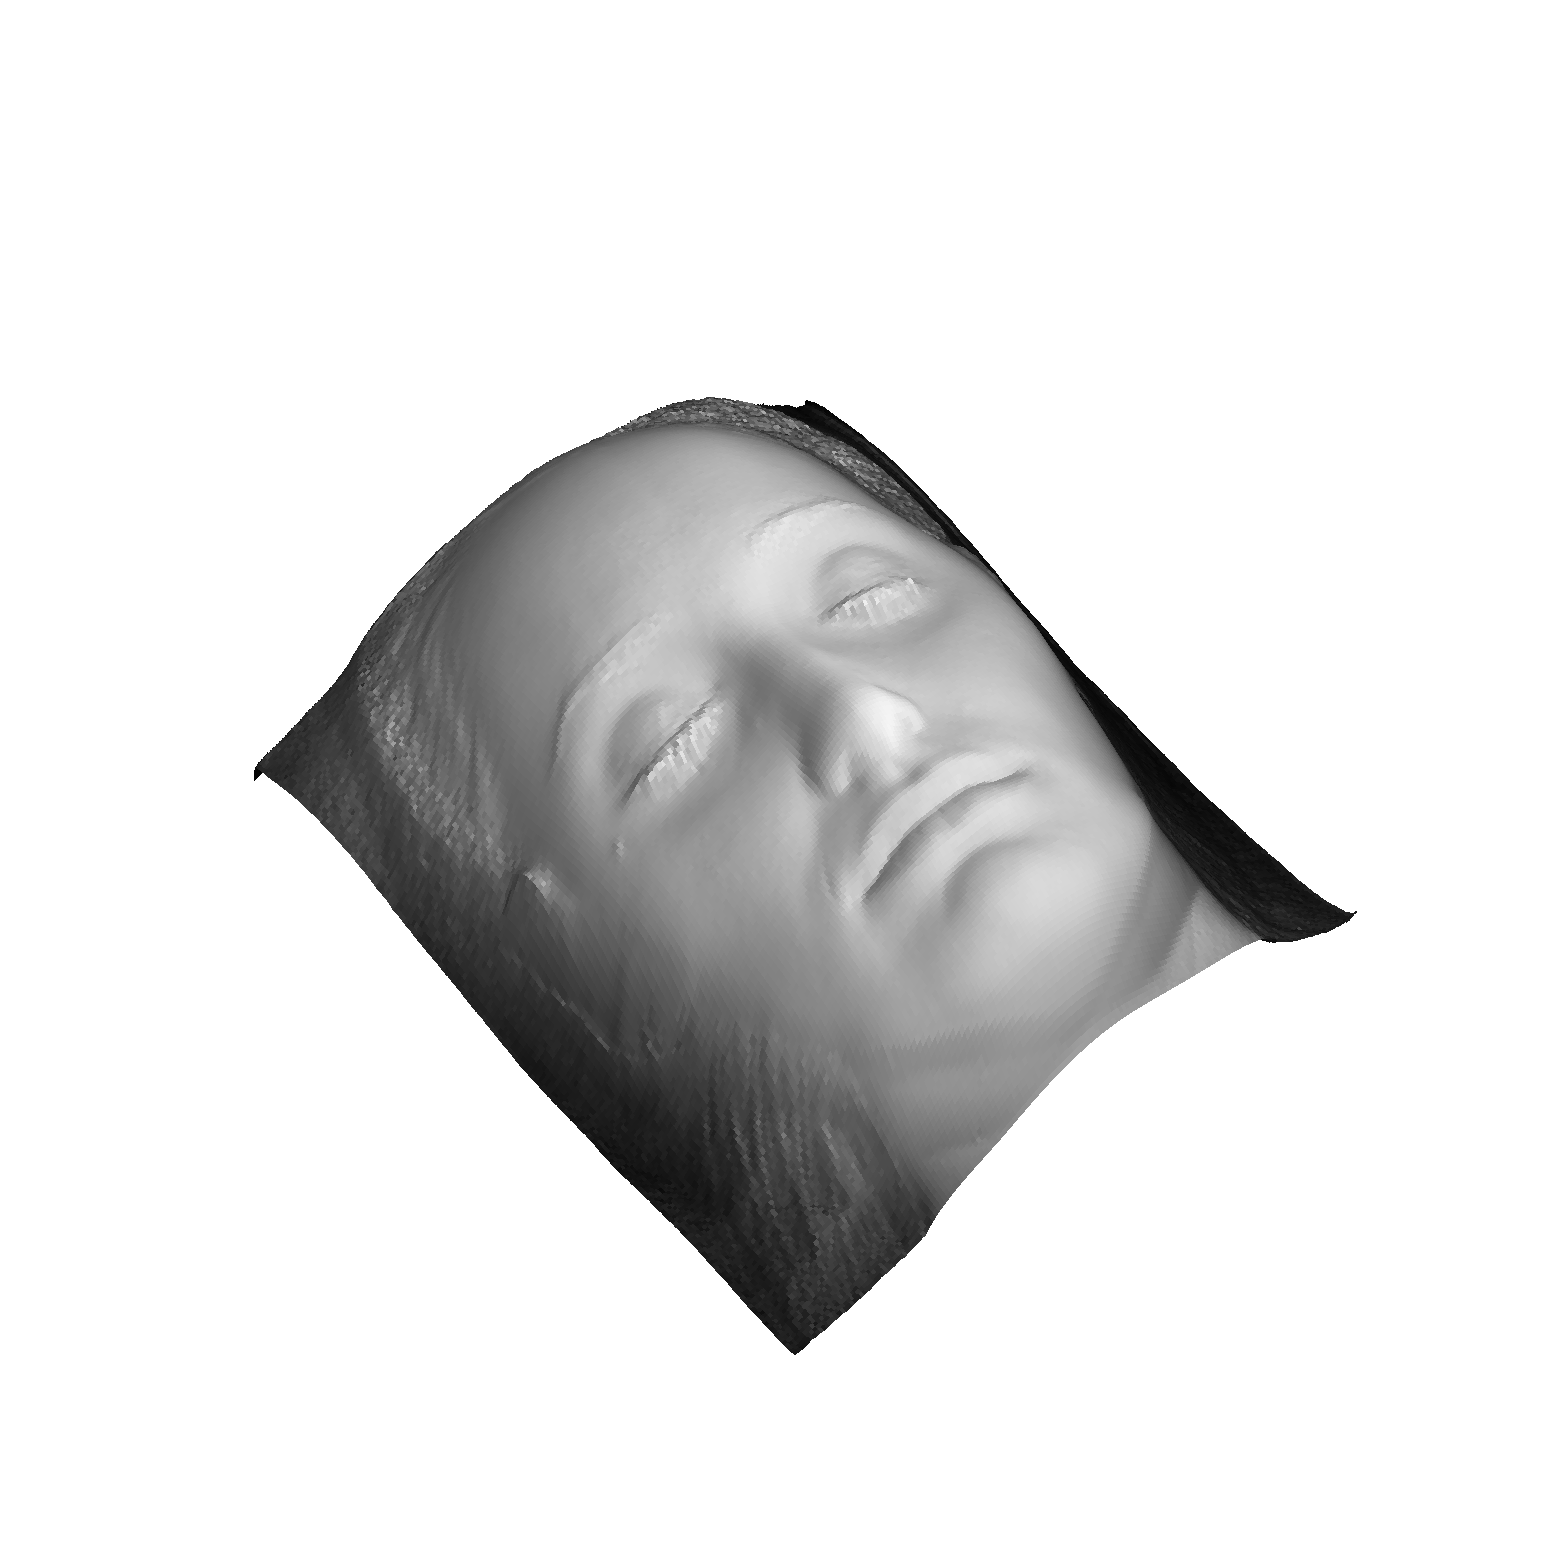

In [9]:
# Run the cell below to plot Z as a surface:
n = normals

Z = integrate_frankot(n)

h, w = n[:, :, 0].shape

# Define a meshgrid of X and Y coordinates
X,Y = np.meshgrid(np.arange(w), np.arange(h))

# Create a figure and define its axes
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ax.axis('off')

# Define the viewing angle
ax.view_init(elev=240, azim=-50)

# Define a light source direction
ls = LightSource(azdeg=260, altdeg=125)
surf_illum = ls.shade(Z, cmap=cm.gist_yarg)

# Shade data, creating an rgb array.
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0,
                       antialiased=False, facecolors=surf_illum)
# Resolution of rendering and time needed to render will depend on rstride and cstride

# Create cubic bounding box to simulate equal aspect ratio
# https://stackoverflow.com/questions/13685386/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
    ax.plot([xb], [yb], [zb], 'w')

# Show the plot
plt.show()

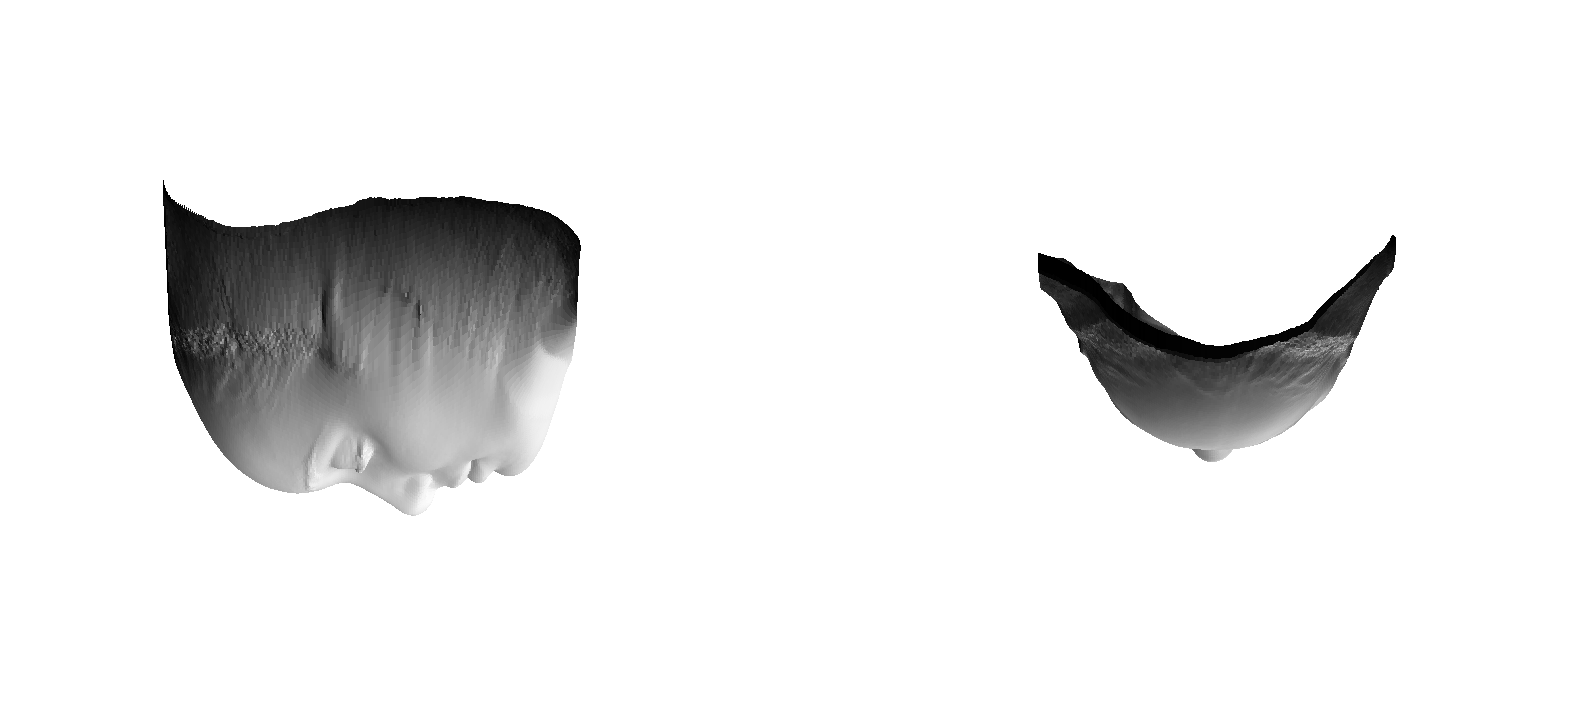

In [10]:
# Run the cell below to plot Z as a surface:
n = normals

Z = integrate_frankot(n)

h, w = n[:, :, 0].shape

# Define a meshgrid of X and Y coordinates
X,Y = np.meshgrid(np.arange(w), np.arange(h))



# Create a figure and define its axes
fig = plt.figure(figsize=(20,18))

ax1 = fig.add_subplot(121, projection='3d')
ax1.axis('off')

# Define the viewing angle
ax1.view_init(elev=0, azim=0)
# ax.view_init(elev=240, azim=-50)

# Define a light source direction
ls = LightSource(azdeg=0, altdeg=0)
# ls = LightSource(azdeg=260, altdeg=125)
surf_illum = ls.shade(Z, cmap=cm.gist_yarg)

# Shade data, creating an rgb array.
surf = ax1.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0,
                       antialiased=False, facecolors=surf_illum)
# Resolution of rendering and time needed to render will depend on rstride and cstride

# Create cubic bounding box to simulate equal aspect ratio
# https://stackoverflow.com/questions/13685386/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
    ax.plot([xb], [yb], [zb], 'w')



ax2 = fig.add_subplot(122, projection='3d')
ax2.axis('off')

# Define the viewing angle
ax2.view_init(elev=0, azim=-90)
# ax.view_init(elev=240, azim=-50)

# Define a light source direction
ls = LightSource(azdeg=0, altdeg=90)
# ls = LightSource(azdeg=260, altdeg=125)
surf_illum = ls.shade(Z, cmap=cm.gist_yarg)

# Shade data, creating an rgb array.
surf = ax2.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0,
                       antialiased=False, facecolors=surf_illum)
# Resolution of rendering and time needed to render will depend on rstride and cstride

# Create cubic bounding box to simulate equal aspect ratio
# https://stackoverflow.com/questions/13685386/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
    ax2.plot([xb], [yb], [zb], 'w')


**e (optional bonus).** Create an interactive 3D plot of the face using the plotly library. Your solution may use the ideas in this [blog post](https://chart-studio.plotly.com/~empet/16132/color-image-quantization-and-tex/#/) and/or the code in the [accompanying github repository](https://github.com/empet/Texture-mapping-with-Plotly/tree/main). These describe how to display a 2D albedo image on a 3D shape (a process called "texture mapping") in two ways, one where the surface is a graph $(x,y,z(x,y))$ like your 3D face model, and another where the surface is a 3D mesh (sets of vertices and triangles), which does not apply to the present case.

Note: One trick described in the blog and used in the code is that plotly requires the albedo colors to be stored using indexed color (i.e., a color palette like GIF) instead of truecolor (RGB values). The code in the repo has its own utility function to do the image conversion, but it might be possible to instead use the `im.quantize()` method that is [built into pillow](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.quantize).

After you create the plot, write a sentence or two that describes your approach.

In [11]:

# TO DO: Your code here


## Description ##

*to do: write your description here*

### Disclosure of use of Generative AI for this question


<br />

*If you used Generative AI tools for this question, write your summary here.*

<br />


## Question 4 (40%)

A reasonable reflectance model for dielectric (non-conducting) surfaces is the so-called dichromatic model, according to which the spectral BRDF is written as a linear combination of a Lambertian diffuse component $f_d$ and a wavelength-independent specular component $f_s$:

\begin{equation}
f(\lambda,\hat{\omega}_i,\hat{\omega}_o)=f_d(\lambda)+f_s(\hat{\omega}_i,\hat{\omega}_o).
\end{equation}

When one images a scene comprised of such surfaces under a directional light source with spectral power distribution $I(\lambda)$ and direction $\hat{l}=(l_x,l_y,l_z)$, the RGB values $\vec{C}(\vec{u})=(C_R(\vec{u}), C_G(\vec{u}), C_B(\vec{u}))$ recorded at pixel $\vec{u}=(u,v)$ can be expressed as

\begin{equation}
\vec{C}(\vec{u})=\langle\hat{n}(\vec{u}),\hat{l}\rangle\vec{d}(\vec{u})+g_s(\vec{u})\vec{s},
\end{equation}

where $\langle\cdot,\cdot\rangle$ is the inner product operation, $\hat{n}(\vec{u})$ is the surface normal at the scene point imaged by pixel $\vec{u}$, and $g_s(\vec{u})$ is a function that depends non-linearly on $\hat{n}(\vec{u})$ (as well as view and lighting directions) through the specular component of the BRDF.

**a.** Assuming that the spectral sensitivities of a camera's three filters are $(c_R(\lambda), c_G(\lambda), c_B(\lambda))$ and that the BRDF at the surface point imaged at pixel $\vec{u}$ is $f(\lambda,\hat{\omega_i}(\vec{u}),\hat{\omega_o}(\vec{u}))=f_d(\lambda,\vec{u})+f_s(\hat{\omega_i}(\vec{u}),\hat{\omega}_o(\vec{u}))$, write expressions for the elements of the *diffuse color vectors* $\vec{d}(\vec{u})$ and the *source color vector* $\vec{s}$.

## Answer ##

Read http://www.eecs.harvard.edu/~zickler/papers/ColorSubspaces_IJCV.pdf
http://www.eecs.harvard.edu/~zickler/papers/ColorSubspaces_IJCV.pdf
Read http://eecs.harvard.edu/~zickler/download/photodiff_cvpr05.pdf
http://eecs.harvard.edu/~zickler/download/photodiff_cvpr05.pdf

The dichromatic model of reflectance assumes that the BRDF of a surface can be decomposed into two additive components: specular reflectance and diffuse reflectance. First we will solve for the difuse reflectance or the diffuse color vectors, $\vec{d}(\vec{u})$. The diffuse color vector is the vector that represents the change in the color and light source depending on the normals. We must consider each pixel and the change there is on its color. And we will integrate over the entire spectrum.

$\vec{d}(\vec{u}) = \int_{\lambda_{\text{min}}}^{\lambda_{\text{max}}}𝑓𝑑(𝜆,𝑢⃗) \vec{C}(λ)\vec{l}(λ) dλ$

Where $\vec{C}$ and $\vec{l}$ are the RGB colors and the direction of the light source at the pixel λ. 𝑓𝑑 is the function of the lambertian diffuse component. For the source color vector, we must consider the change in color and direction of the light sensors instead of each pixel normals.

Next we can find the expression for the source color vector $\vec{s}$.

$\vec{s} = \int_{\lambda_{\text{min}}}^{\lambda_{\text{max}}}\vec{C}(λ)\vec{l}(λ) dλ$

The source color vector represents the source strength of the sensors.

**b.** Suppose you are given two unit-length three-vectors $\hat{r}_1$ and $\hat{r}_2$ that are orthogonal to $\vec{s}$. Show that the two-channel image (note: this image can have pixels with negative values, and these negative values are just as useful as the positive ones)  given by the per-pixel inner products $\vec{J}(\vec{u})=(\langle\hat{r}_1,\vec{C}(\vec{u})\rangle, \langle\hat{r}_2,\vec{C}(\vec{u})\rangle)$:


1. does not depend on the specular components of the BRDFs, $f_s(\hat{\omega_i}(\vec{u}),\hat{\omega}_o(\vec{u}))$.
2. depends linearly on the surface normals, $\hat{n}(\vec{u})$.

## Answer ##

1. Since the vectors $\hat{r}_1$ and $\hat{r}_2$ are orthogonal to $\vec{s}$, $<\hat{r}_1, s> = 0$ and $<\hat{r}_2, s> = 0$. The inner product of two orthogonal if they are orthogonal. And therefore, the per-pixel inner products
$\vec{J}(\vec{u})=(\langle\hat{r}_1,\vec{C}(\vec{u})\rangle, \langle\hat{r}_2,\vec{C}(\vec{u})\rangle)$ does not depend on the specular components because the addition of the $\vec{s}$ would make the inner product equal to zero.


2. If we find the inner product of the unit-length vectors $\hat{r}_1$ and $\hat{r}_2$ with the surface normals $\hat{n}(\vec{u})$, then we get the follow.
  
  $< \hat{r}_1 ,\hat{n}(\vec{u})> = \hat{r}_1 \cdot \hat{n}(\vec{u})$

  $< \hat{r}_2 ,\hat{n}(\vec{u})> = \hat{r}_2 \cdot \hat{n}(\vec{u})$

   The per-pixel inner products linearly depend on the surface normals,𝑛̂ (𝑢⃗) because the dot product is a linear operation. As the surface normal varies, the corresponding component also varies.

**c.** Show that the two properties from part (b) are also satisfied by the single-channel (grayscale) image $J(\vec{u})=||\vec{J}(\vec{u})||$.




## Answer ##

1. When we take the normal of $\vec{J}(\vec{u})$ we get ||𝐽⃗ (𝑢⃗ )|| which eliminates the directional information and leaves only the magnitude. The norm ||𝐽⃗ (𝑢⃗ )|| is separated from the directional compents and does not depend on the specular components of the BRDF.  

2. The inner product of a vector with itself is the magnitude squared, so
$<\vec{J}(\vec{u}), \vec{J}(\vec{u})> = ||\vec{J}(\vec{u})||^2$. Thus, the operation of the norm will perserve the linearity and will also linearly depend on the surface normals.



**d.** Write a function <tt>make_lambertian(im,s)</tt> that takes an RGB image <tt>im</tt> and a source color vector <tt>s</tt> and computes the grayscale image $J(\vec{u})$ from part (c). Run this function on the image <tt>fruitbowl.png</tt> fromthe data folder using <tt>s=[0.6257    0.5678 0.5349]</tt> and submit the results. Explain in three sentences or less why <tt>imout</tt> might be more useful than <tt>im</tt> to a computer vision system. (See hints below for help with displaying these images.)

Text(0.5, 1.0, 'Fruitbowl GrayScale')

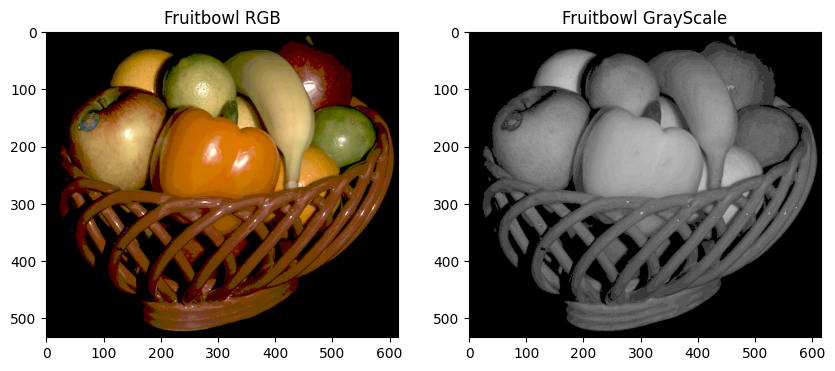

In [13]:
def make_lambertian(im, s):
    I_suv=np.zeros(im.shape)
    unit = [1.0, 0.0, 0.0]
    rot=s/np.linalg.norm(s)
    uvw = np.cross(rot, unit)
    rcos = np.dot(rot, unit)
    rsin = np.linalg.norm(uvw)

    if not np.isclose(rsin, 0):
      uvw = uvw/rsin
    u, v, w = uvw

    R = (rcos * np.eye(3) + rsin * np.array([
            [ 0, -w,  v],
            [ w,  0, -u],
            [-v,  u,  0]
        ]) + (1.0 - rcos) * uvw[:,None] * uvw[None,:]
    )


    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            I_suv[i,j,:]=np.matmul(R,im[i,j,:])

    S=I_suv[:,:,0]
    G=np.sqrt(I_suv[:,:,1]**2 + I_suv[:,:,2]**2)
    return G

fruitrgb = cv2.cvtColor(cv2.imread('data/fruitbowl.png'), cv2.COLOR_BGR2RGB)
fruitrgb = (fruitrgb / np.max(fruitrgb))


s = np.array([0.6257, 0.5678, 0.5349])
grayscale = make_lambertian(fruitrgb, s)

plt.subplot(121)
plt.imshow(np.minimum(1,10*fruitrgb)**(1/2.2))
plt.title("Fruitbowl RGB")

plt.subplot(122)
plt.imshow(np.minimum(1,10*grayscale)**(1/2.2), cmap='gray')
plt.title("Fruitbowl GrayScale")

## Explanation ##

*to do: write your explanation here*

### Disclosure of use of Generative AI for this question


<br />

*If you used Generative AI tools for this question, write your summary here.*

<br />


## Hints and Information

* The following code demonstrates one way to use the <tt>matplotlib.pyplot.quiver</tt> function.

  ```python
  # vect_x is an HxW array of x-components
  # vect_y is an HxW array of y-components
  plt.figure()
  plt.quiver(vect_x,vect_y,cmap='gray')
  plt.gca().invert_yaxis();
  plt.axis('image');
  plt.axis('off')';

  ```

  Note that the vector components should be displayed at a suitable resolution.  For example, the figure below shows the $x$-$y$ components of a field of surface normals at three different resolutions. The plot in the middle provides the best summary of the surface shape.  The resolution can be adjusted by plotting only every
  $n^\mathrm{th}$ element as in <tt>plt.quiver(vect_x[::n, ::n], vect_y[::n, ::n])</tt>.

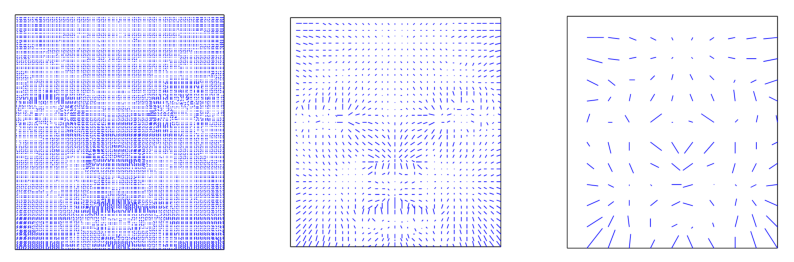

In [ ]:
plt.imshow(cv2.imread('img/babys_normals.png')[:, :, ::-1]); plt.axis('off');


- When computing the output radiance from a field of surface normals $\hat{n}(x,y)$ with unit albedo $\rho(x,y)=1$ illuminated from direction $\hat{s}$, you should clip negative values using $L(x,y)=\max(0,\hat{s}^\top\hat{n}(x,y))$.

- We are commonly faced with a situation in which we need to evaluate the integral over the hemisphere of the function $\cos\theta$, where $0\le\theta\pi$ is the angular distance between the radial line through a point on the hemisphere and the radial line through its apex:

  \begin{equation}
  \int_\Omega \cos\theta d\boldsymbol{\omega}
  \end{equation}

  The first step is to define a parameterization of the hemisphere using spherical coordinates, and the second is to write an element of the solid angle $d\boldsymbol{\omega}$ in terms of this parameterization. As shown in almost any introductory calculus book (and Forsyth & Ponce), we can write this integral as

  \begin{equation}
  \int_0^{2\pi} \int_0^{\pi/2} \cos\theta\sin\theta d\theta d\phi,
  \end{equation}

  which is straightforward to evaluate using the appropriate trigonometric identity.


- A simple way to numerically obtain a set of $N-1$ unit-length vectors that are orthogonal to $N$-vector $\vec{v}$ is to use the <tt>scipy.linalg.null_space</tt> function.

- The image <tt>fruitbowl.png</tt> from the assignment's data folder is a 16-bit image with relatively high dynamic range, and it does not display well using standard image viewers. One way to get a reasonable depiction of it is to multiply by a large gain factor and then clip the bright highlights:

    ```python
    plt.imshow(np.minimum(1,10*fruitrgb)**(1/2.2))
    ```


# Submission

The cells below generate two files in the folder `cs-283-assignments/A7/submit` on your Google Drive:

1.   `LASTNAME_FIRSTNAME_pset7.html`: an HTML report of your notebook **[Submit to GradeScope, after converting to PDF format]**
2.   `LASTNAME_FIRSTNAME_pset7.zip`: a `.zip` file including (1) all of the source files in the folder `pset7`, and (2) `pset7.ipynb` **[Submit to Canvas]**

**Remember to edit the filenames (either in the cells below or on your local computer after downloading) to match your name, and make sure to save your notebook before running the cells.**


In [14]:
!mkdir "submit"

In [15]:
# Convert to HTML - don't forget to add your name
# Make sure to save your notebook before running the following
!jupyter nbconvert --to html pset7.ipynb --output-dir "submit" --output "Hartogensis_Alexia_pset7.html"

[NbConvertApp] Converting notebook pset7.ipynb to html
[NbConvertApp] Writing 2219188 bytes to submit/Hartogensis_Alexia_pset7.html


In [16]:
from zipfile import ZipFile

def writeFolder(zip, path):
  import os
  for dirpath,dirs,files in os.walk(path):
    for f in files:
      fn = os.path.join(dirpath, f)
      zip.write(fn)

def writeFile(zip, path):
  zip.write(path)

In [17]:
# Zip source - don't forget to add your name
zipObj = ZipFile('submit/Hartogensis_Alexia_pset7.zip', 'w')

writeFolder(zipObj, "pset7")
writeFile(zipObj, "pset7.ipynb")

zipObj.close()